In [2]:
import numpy as np
from sklearn.datasets import fetch_lfw_people
import matplotlib.pylab as plt
from ipywidgets import interact
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
import pickle
import time
from sklearn.decomposition import PCA

from sklearn import __version__ as sk_version
%matplotlib inline

adDf = pd.read_csv('Advertising Budget and Sales.csv')

sales = adDf['Sales ($)']
TVbud = adDf['TV Ad Budget ($)']
radBud = adDf['Radio Ad Budget ($)']
newsBud = adDf['Newspaper Ad Budget ($)']

adDf


,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.datasets import fetch_lfw_people
import time
from sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split

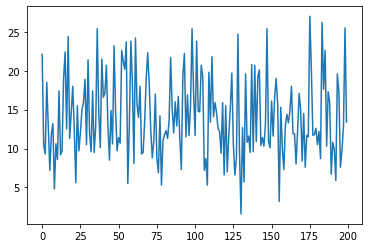

In [4]:
# sales plot
sales = adDf['Sales ($)']

plt.plot(sales)

Text(0.5, 0, 'TV Ad Budget (USD)')

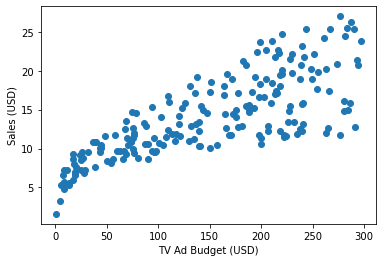

In [57]:
# TV ad budget vs sales

plt.scatter( TVbud,sales)
plt.ylabel('Sales (USD)')
plt.xlabel('TV Ad Budget (USD)')


Text(0.5, 0, 'Radio Ad Budget (USD)')

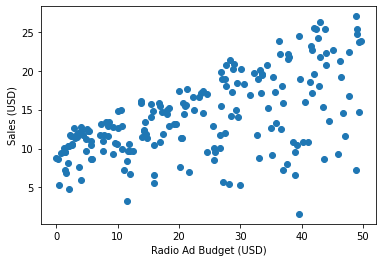

In [58]:
plt.scatter( radBud,sales)
plt.ylabel('Sales (USD)')
plt.xlabel('Radio Ad Budget (USD)')

Text(0.5, 0, 'Newspaper Ad Budget (USD)')

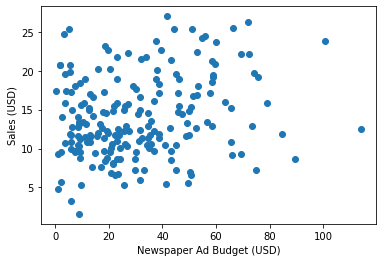

In [59]:
plt.scatter( newsBud,sales)
plt.ylabel('Sales (USD)')
plt.xlabel('Newspaper Ad Budget (USD)')


Text(0, 0.5, 'sales')

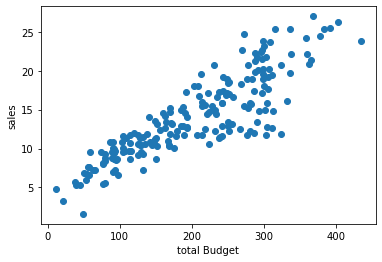

In [8]:
plt.scatter( newsBud+TVbud+radBud,sales)
plt.xlabel('total Budget')
plt.ylabel('sales')


In [9]:
print('data analysis')

data analysis


Text(0.5, 0, 'Newspaper Ad Budget (USD)')

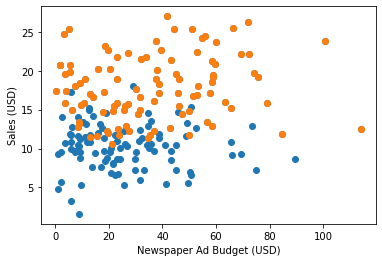

In [53]:
import numpy as np
N = 10000
xr = newsBud
yr = sales
x = np.concatenate((xr[0:100],xr[100:]))
y = np.concatenate((yr[0:100],yr[100:]))

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
#plt.plot(x,p(x),"r-")
newssl = p[1]
newsini = p[0]
plt.scatter(newsBud,sales)
plt.scatter(newsBud[newsBud+TVbud+radBud >= np.sort(newsBud+TVbud+radBud)[100]],sales[newsBud+TVbud+radBud >= np.sort(newsBud+TVbud+radBud)[100]])
plt.ylabel('Sales (USD)')
plt.xlabel('Newspaper Ad Budget (USD)')


Text(0.5, 0, 'radio Ad Budget (USD)')

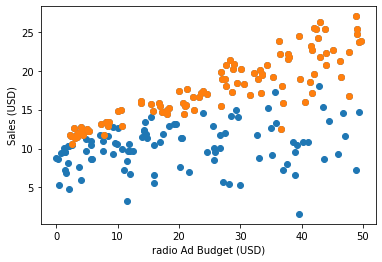

In [54]:
import numpy as np
N = 10000
xr = radBud
yr = sales
x = np.concatenate((xr[0:100],xr[100:]))
y = np.concatenate((yr[0:100],yr[100:]))

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
#plt.plot(x,p(x),"r-")
radsl = p[1]
radini = p[0]
plt.scatter(radBud,sales)
plt.scatter(radBud[newsBud+TVbud+radBud >= np.sort(newsBud+TVbud+radBud)[100]],sales[newsBud+TVbud+radBud >= np.sort(newsBud+TVbud+radBud)[100]])
plt.ylabel('Sales (USD)')
plt.xlabel('radio Ad Budget (USD)')


Text(0.5, 0, 'TV Ad Budget (USD)')

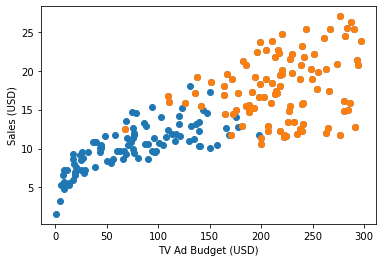

In [55]:
import numpy as np
N = 10000
xr = TVbud
yr = sales
x = np.concatenate((xr[0:100],xr[100:]))
y = np.concatenate((yr[0:100],yr[100:]))

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
#plt.plot(x,p(x),"r-")
tvsl = p[1]
tvini = p[0]
plt.scatter(TVbud,sales)
plt.scatter(TVbud[newsBud+TVbud+radBud >= np.sort(newsBud+TVbud+radBud)[100]],sales[newsBud+TVbud+radBud >= np.sort(newsBud+TVbud+radBud)[100]])
plt.ylabel('Sales (USD)')
plt.xlabel('TV Ad Budget (USD)')

Text(0.5, 0, 'Newspaper Ad Budget (USD)')

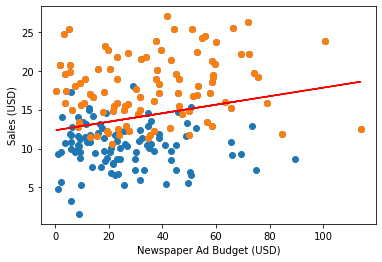

In [13]:
import numpy as np
N = 10000
xr = newsBud
yr = sales
x = np.concatenate((xr[0:100],xr[100:]))
y = np.concatenate((yr[0:100],yr[100:]))

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-")
newssl = p[1]
newsini = p[0]
plt.scatter(newsBud,sales)
plt.scatter(newsBud[newsBud+TVbud+radBud >= np.sort(newsBud+TVbud+radBud)[100]],sales[newsBud+TVbud+radBud >= np.sort(newsBud+TVbud+radBud)[100]])
plt.ylabel('Sales (USD)')
plt.xlabel('Newspaper Ad Budget (USD)')


In [14]:
highpp = newsBud+TVbud+radBud >= np.sort(newsBud+TVbud+radBud)[100]
lowpp =newsBud+TVbud+radBud <= np.sort(newsBud+TVbud+radBud)[100]

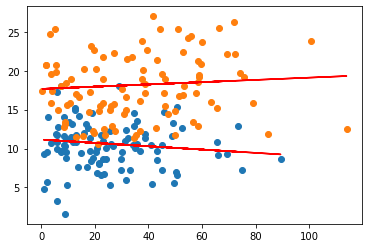

In [15]:
plt.scatter(newsBud[lowpp],sales[lowpp])
xr = newsBud[lowpp]
yr = sales[lowpp]
x = np.concatenate((xr[0:50],xr[100:]))
y = np.concatenate((yr[0:50],yr[100:]))

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-")
newsmin = p[1]
newsim = p[0]
plt.scatter(newsBud[highpp],sales[highpp])
xr = newsBud[highpp]
yr = sales[highpp]
x = np.concatenate((xr[0:50],xr[100:]))
y = np.concatenate((yr[0:50],yr[100:]))

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-")
newsmax = p[1]
newsi = p[0]

-0.02128153529805724
0.014457102299673825
p[1] is the slope and p[0] is y intercept of average line


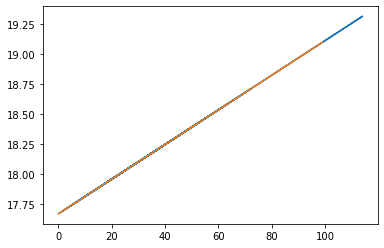

In [16]:
#for test does not count
xx = np.arange(0,100,1)

plt.plot(x,p(x))
y = p[0]+p[1]*xx
plt.plot(xx,y)
print(newsmin)
print(newsmax)
print('p[1] is the slope and p[0] is y intercept of average line')

0.05456129249488672
0.2446914049314321


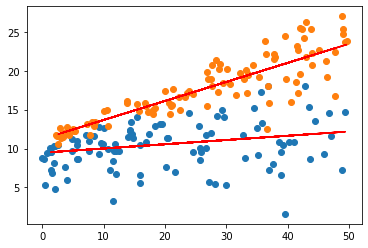

In [17]:
plt.scatter(radBud[lowpp],sales[lowpp])
xr = radBud[lowpp]
yr = sales[lowpp]
x = np.concatenate((xr[0:50],xr[100:]))
y = np.concatenate((yr[0:50],yr[100:]))

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-")
radmin = p[1]
radim = p[0]
plt.scatter(radBud[highpp],sales[highpp])
xr = radBud[highpp]
yr = sales[highpp]
x = np.concatenate((xr[0:50],xr[100:]))
y = np.concatenate((yr[0:50],yr[100:]))

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-")
radmax = p[1]
radi = p[0]
print(radmin)
print(radmax)

0.0438215636342733
0.029530872780229454


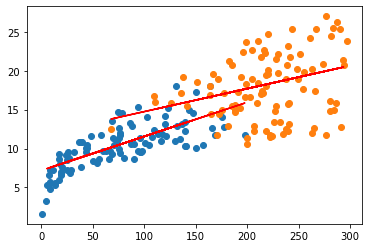

In [18]:
plt.scatter(TVbud[lowpp],sales[lowpp])
xr = TVbud[lowpp]
yr = sales[lowpp]
x = np.concatenate((xr[0:50],xr[100:]))
y = np.concatenate((yr[0:50],yr[100:]))

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-")
tvmin = p[1]
tvim = p[0]
plt.scatter(TVbud[highpp],sales[highpp])
xr = TVbud[highpp]
yr = sales[highpp]
x = np.concatenate((xr[0:50],xr[100:]))
y = np.concatenate((yr[0:50],yr[100:]))

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-")
tvmax = p[1]
tvi = p[0]
print(tvmin)
print(tvmax)

In [19]:
print('volatility is a way to measure how off the price is from the expected a volitility of 100 means it is 100 percent more or less than expected')

volatility is a way to measure how off the price is from the expected a volitility of 100 means it is 100 percent more or less than expected


In [20]:
tvminvolatility = abs((tvmin*TVbud[lowpp] +tvim-sales[lowpp])/sales[lowpp])
tvmaxvolatility = abs((tvmax*TVbud[highpp] +tvi-sales[highpp])/sales[highpp])

radminvolatility = abs((radmin*radBud[lowpp] +radim-sales[lowpp])/sales[lowpp])
radminvolatility = radminvolatility[radminvolatility <= 100]
radmaxvolatility = abs((radmax*radBud[highpp] +radi-sales[highpp])/sales[highpp])

newsminvolatility = abs((newsmin*newsBud[lowpp] +newsim-sales[lowpp])/sales[lowpp])
newsmaxvolatility = abs((newsmax*newsBud[highpp] +newsi-sales[highpp])/sales[highpp])
radminvolatility.sum()

31.45980925822288

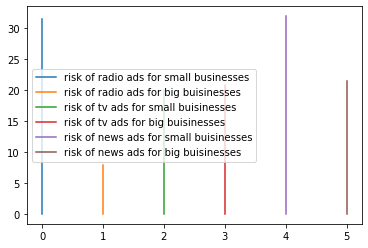

In [21]:
plt.plot([0,0],[0,radminvolatility.sum()], label = 'risk of radio ads for small businesses')
plt.plot([1,1],[0,radmaxvolatility.sum()], label = 'risk of radio ads for big buisinesses')
plt.plot([2,2],[0,tvminvolatility.sum()], label = 'risk of tv ads for small buisinesses')
plt.plot([3,3],[0,tvmaxvolatility.sum()], label = 'risk of tv ads for big buisinesses')
plt.plot([4,4],[0,newsminvolatility.sum()], label = 'risk of news ads for small buisinesses')
plt.plot([5,5],[0,newsmaxvolatility.sum()], label = 'risk of news ads for big buisinesses')
plt.legend()

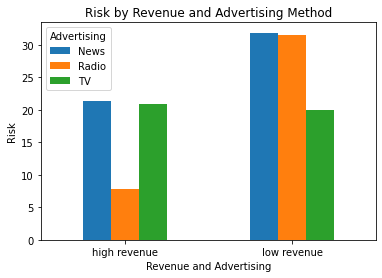

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a sample DataFrame with revenue and advertising data
data = pd.DataFrame({
    'Revenue': ['low revenue', 'high revenue', 'low revenue', 'high revenue', 'low revenue', 'high revenue', ],
    'Advertising': ['Radio', 'Radio','TV', 'TV', 'News', 'News'],
    'sales': [radminvolatility.sum(), radmaxvolatility.sum(), tvminvolatility.sum(), tvmaxvolatility.sum(), 
              newsminvolatility.sum(), newsmaxvolatility.sum()]
})

# Reshape the data using groupby() and pivot()
data_pivot = data.groupby(['Revenue', 'Advertising'])['sales'].sum().reset_index().pivot(index='Revenue', columns='Advertising', values='sales')

# Create a bar plot with multi-level labels
ax = data_pivot.plot(kind='bar')

# Set the title and labels for the graph
plt.title('Risk by Revenue and Advertising Method')
plt.xlabel('Revenue and Advertising')
plt.ylabel('Risk')
plt.xticks(rotation = 0)
# Display the graph
plt.show()


In [23]:
TVbud[lowpp]

1       44.5
2       17.2
5        8.7
6       57.5
7      120.2
       ...  
192     17.2
194    149.7
195     38.2
196     94.2
197    177.0
Name: TV Ad Budget ($), Length: 101, dtype: float64

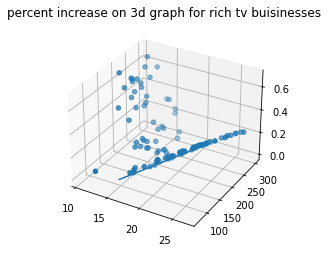

In [24]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
fig = plt.figure()
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
# defining all 3 axis

 
# plotting
ax.scatter3D(sales[highpp],TVbud[highpp],tvmaxvolatility , 'green')
ax.plot3D(tvmax*np.arange(100,300,1) +tvi,np.arange(100,300,1),0)
ax.set_title('percent increase on 3d graph for rich tv buisinesses')
plt.show()






/home/vetnebjo/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/vetnebjo/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.0438215636342733
0.029530872780229454


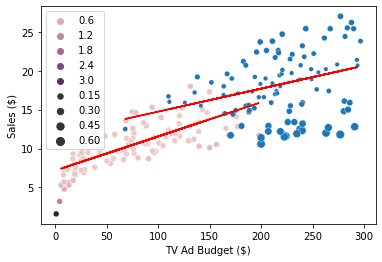

In [25]:
import seaborn
seaborn.scatterplot(TVbud[lowpp],sales[lowpp],tvminvolatility,color = 'blue')
xr = TVbud[lowpp]
yr = sales[lowpp]
x = np.concatenate((xr[0:50],xr[100:]))
y = np.concatenate((yr[0:50],yr[100:]))

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-")
tvmin = p[1]
tvim = p[0]
seaborn.scatterplot(TVbud[highpp],sales[highpp],size = tvmaxvolatility)
xr = TVbud[highpp]
yr = sales[highpp]
x = np.concatenate((xr[0:50],xr[100:]))
y = np.concatenate((yr[0:50],yr[100:]))

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-")
tvmax = p[1]
tvi = p[0]
print(tvmin)
print(tvmax)

In [26]:
#machine learning

In [27]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
x = np.array(TVbud)
y = np.array(sales)

lr = LinearRegression()
lr.fit(x.reshape(-1, 1), y)
print(lr.predict([[2.4]]))
print('predicts based on value and sklearn')

[7.14668149]
predicts based on value and sklearn


In [28]:
#needs work

In [29]:
cost = np.zeros((200,3))
for i in range(200):
    cost[i,0] = TVbud[i]
    cost[i,1] = radBud[i]
    cost[i,2] = newsBud[i]


In [30]:
score = []
for i in range(200):
    scorev = 0
    if tvsl*TVbud[i] +tvini-sales[i] >= 0:
        scorev = scorev+1
    if radsl*radBud[i] +radini-sales[i] >= 0:
        scorev = scorev+1
    if newssl*newsBud[i] +newsini-sales[i] >= 0:
        scorev = scorev+1
    score.append(scorev)
score

[0,
 2,
 2,
 0,
 2,
 3,
 2,
 1,
 3,
 2,
 3,
 0,
 2,
 3,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 3,
 1,
 3,
 2,
 1,
 1,
 0,
 2,
 0,
 3,
 3,
 1,
 3,
 2,
 0,
 2,
 2,
 0,
 1,
 0,
 1,
 2,
 2,
 1,
 3,
 0,
 2,
 3,
 2,
 3,
 0,
 0,
 0,
 0,
 3,
 2,
 0,
 0,
 3,
 0,
 1,
 1,
 0,
 3,
 2,
 1,
 0,
 0,
 0,
 1,
 2,
 2,
 1,
 2,
 3,
 1,
 3,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 1,
 2,
 1,
 2,
 3,
 0,
 0,
 3,
 0,
 2,
 1,
 0,
 1,
 2,
 0,
 1,
 1,
 0,
 0,
 3,
 3,
 3,
 0,
 2,
 0,
 1,
 1,
 1,
 2,
 3,
 3,
 2,
 3,
 0,
 3,
 2,
 1,
 0,
 3,
 3,
 3,
 0,
 3,
 3,
 2,
 3,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 3,
 3,
 2,
 1,
 0,
 2,
 2,
 1,
 2,
 0,
 0,
 1,
 3,
 1,
 2,
 3,
 3,
 1,
 2,
 1,
 0,
 3,
 2,
 2,
 2,
 1,
 1,
 3,
 2,
 3,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 3,
 0,
 1,
 0,
 2,
 0,
 1,
 3,
 2,
 3,
 3,
 0,
 0,
 3,
 3,
 1,
 0,
 1]

In [35]:
train_vectors,test_vectors,train_labels,test_labels = sklearn.model_selection.train_test_split(cost,score, train_size=.70, random_state=None, shuffle=True,)


In [36]:
rerun_training = True
filename = 'full_face_model.p'
filename

'full_face_model.p'

In [37]:
tmp_vectors = train_vectors
tmp_labels = train_labels

In [38]:
tmp_vectors = train_vectors
tmp_labels = train_labels


start = time.time()
rerun_training = True
filename = 'rain'

if rerun_training:
    
    print("Fitting the classifier to the training set")
    param_grid = {'C': [10.0, 50.0, 100.0, 500.0, 1000.0, 5000.0, 10000.0],
                  'gamma': [0.0005, 0.001, 0.005, 0.01]}
    clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid, n_jobs= -1)
    clf = clf.fit(tmp_vectors, tmp_labels)
    print("Best estimator found by grid search:")
    print(clf.best_estimator_)

    #save the model to a file
    pickle.dump(clf, open(filename, 'wb'))

else:
    #read the model from a file
    print("reading pickle file.")
    clf = pickle.load(open(filename, 'rb'))
    print("Best estimator found by grid search:")
    print(clf.best_estimator_)
    
end = time.time()
print("Runtime",end - start)

Fitting the classifier to the training set
Best estimator found by grid search:
SVC(C=10.0, class_weight='balanced', gamma=0.005)
Runtime 3.358121156692505


In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predict_vectors = test_vectors
true_labels = test_labels

pred_labels = clf.predict(predict_vectors)

print(classification_report(true_labels, pred_labels))
print(confusion_matrix(true_labels, pred_labels, labels=range(0, 4)))

              precision    recall  f1-score   support

           0       0.93      0.76      0.84        17
           1       0.40      0.36      0.38        11
           2       0.66      0.90      0.76        21
           3       0.71      0.45      0.56        11

    accuracy                           0.68        60
   macro avg       0.67      0.62      0.63        60
weighted avg       0.70      0.68      0.68        60

[[13  4  0  0]
 [ 1  4  5  1]
 [ 0  1 19  1]
 [ 0  1  5  5]]


Text(69.0, 0.5, 'actual data')

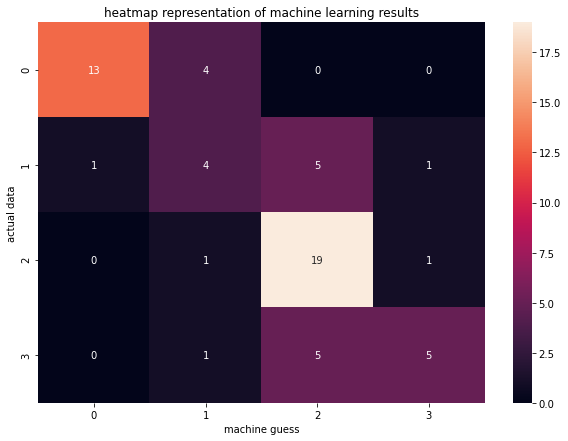

In [48]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = confusion_matrix(true_labels, pred_labels, labels=range(0, 4))

df_cm = pd.DataFrame(array, index = [i for i in "0123"],
                  columns = [i for i in "0123"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.title('heatmap representation of machine learning results')
plt.xlabel('machine guess')
plt.ylabel('actual data')

In [ ]:
predict_vectors = test_vectors
true_labels = test_labels

In [ ]:
pred_labels = clf.predict(predict_vectors)

print(classification_report(true_labels, pred_labels))
print(confusion_matrix(true_labels, pred_labels))
ConfusionMatrixDisplay.from_estimator(clf, test_vectors, test_labels)

In [ ]:
def plot_gallery(images, true_titles, pred_titles, h, w, n_row=5, n_col=5):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray_r)
        plt.title('Pred='+str(categories[pred_titles[i]]), size=9)
        plt.xlabel('Actual='+str(categories[true_titles[i]]), size=9)
        plt.xticks(())
        plt.yticks(())

plot_gallery(test_vectors, test_labels, pred_labels, h,w)

In [65]:
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm



x = cost
y = sales
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 2.938889369459405
Coefficients: 
 [ 0.04576465  0.18853002 -0.00103749]
                            OLS Regression Results                            
Dep. Variable:              Sales ($)   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           1.58e-96
Time:                        11:14:39   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

In [50]:
X_train, X_test, y_train, y_test = train_test_split(adDf[['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)']], sales, test_size=0.2, random_state=42)


In [51]:

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error


reg = DecisionTreeRegressor(max_depth=3, random_state=432)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)

MSE:  4.956555640715921


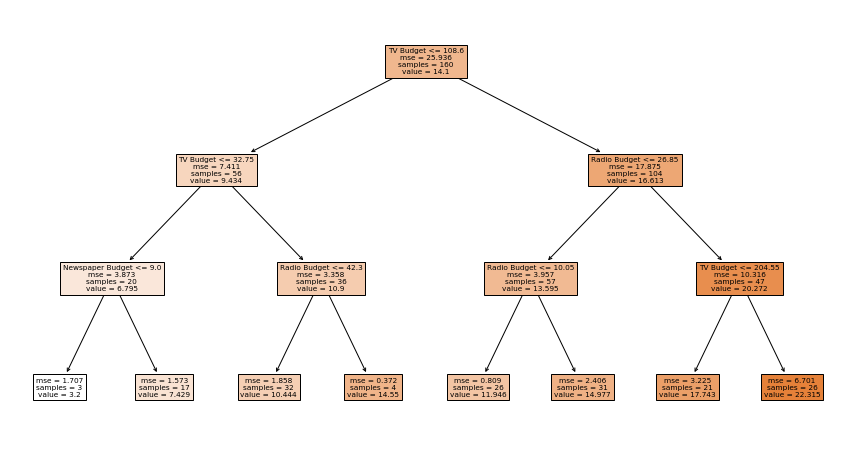

In [52]:
features = ['TV Budget', 'Radio Budget', 'Newspaper Budget']

fig, ax = plt.subplots(figsize=(15, 8))
plot_tree(reg, filled = True, ax=ax, feature_names = features)
plt.show()
#value = Company revenue in these samples
#basically shows that if you have above a certain amount in TV  and Radio budget that should be the most 
#effective way to raise revenue